In [ ]:
# 📦 Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🎨 
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# 📂  dataset
df = pd.read_csv('C:/Users/itzel/OneDrive/Documentos/Proyectos Git/europe-sustainability-story/data/owid-co2-data.csv')


# 👀 
df.head()


,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
pip install pandas matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\itzel\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
european_countries = [
    'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia',
    'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
    'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg',
    'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia',
    'Slovenia', 'Spain', 'Sweden', 'Norway', 'Switzerland'
]


In [ ]:
# European Countries
df_europe = df[df['country'].isin(european_countries)]

# Since 1960
df_europe = df_europe[df_europe['year'] >= 1960]

# Verify
df_europe[['country', 'year', 'co2', 'population', 'gdp']].head()


,country,year,co2,population,gdp
3804,Austria,1960,30.784,7047274.0,7.322992e+10
3805,Austria,1961,31.824,7086061.0,7.711311e+10
3806,Austria,1962,33.865,7129580.0,7.898463e+10
3807,Austria,1963,36.949,7175502.0,8.219174e+10
3808,Austria,1964,38.896,7223393.0,8.713349e+10


C:\Users\itzel\AppData\Local\Temp\ipykernel_15224\4086906119.py:25: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\itzel\AppData\Local\Temp\ipykernel_15224\4086906119.py:28: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.savefig(r'C:\Users\itzel\OneDrive\Documentos\Proyectos Git\europe-sustainability-story\outputs\plots\CO2_Emissions_Top10.png')
C:\Users\itzel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


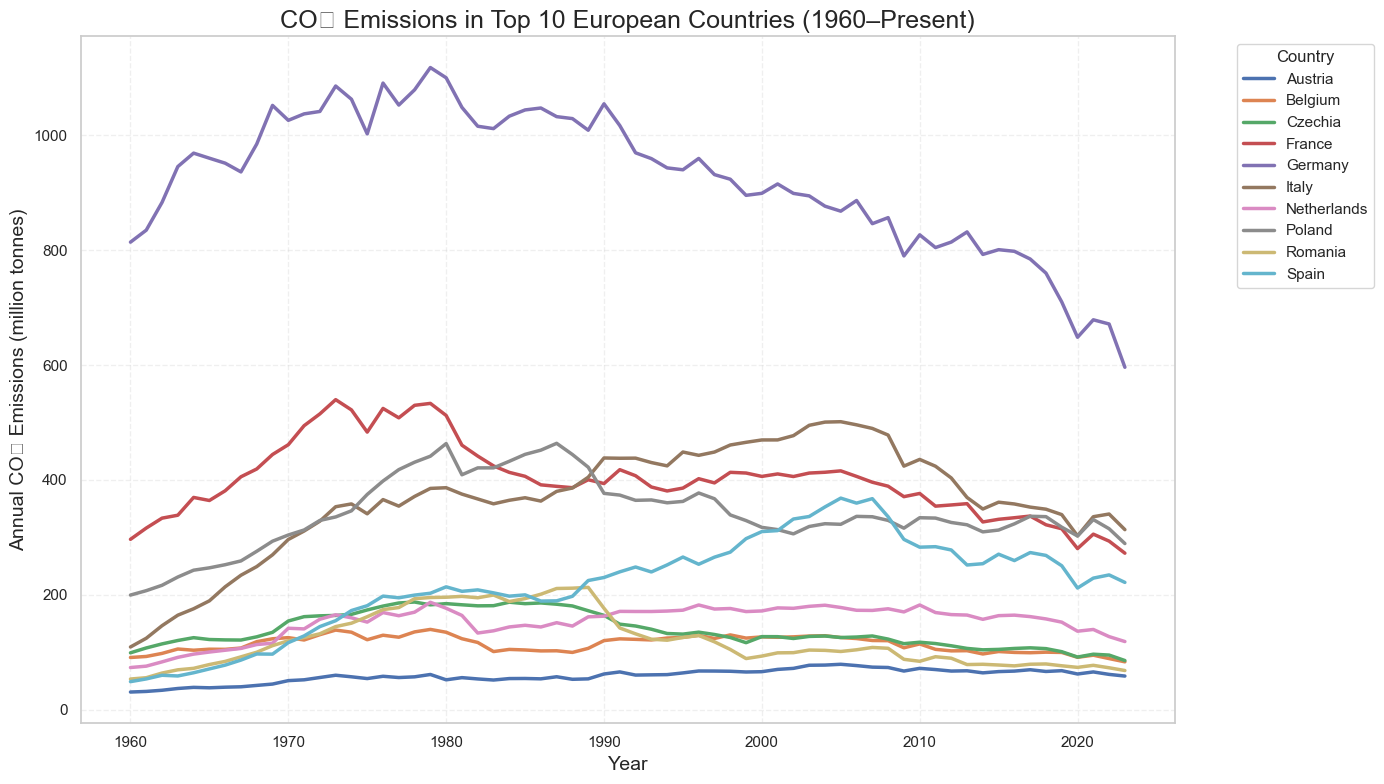

In [14]:
# Select relevant columns
plot_df = df_europe[['country', 'year', 'co2']].dropna()

# Focus on top 10 emitters in Europe (based on latest year available)
latest_year = plot_df['year'].max()
top_emitters = (
    plot_df[plot_df['year'] == latest_year]
    .sort_values(by='co2', ascending=False)
    .head(10)['country']
    .tolist()
)

# Filter only those countries
plot_df = plot_df[plot_df['country'].isin(top_emitters)]

# Plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=plot_df, x='year', y='co2', hue='country', linewidth=2.5)

# Styling
plt.title('CO₂ Emissions in Top 10 European Countries (1960–Present)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Annual CO₂ Emissions (million tonnes)', fontsize=14)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.3)

plt.savefig(r'C:\Users\itzel\OneDrive\Documentos\Proyectos Git\europe-sustainability-story\outputs\plots\CO2_Emissions_Top10.png')

plt.show()


## European CO₂ Emissions Over Time

This chart shows how the top 10 European countries have contributed to global CO₂ emissions since 1960. While there has been a general decline in emissions since the early 2000s, the data reveals significant differences in trends across countries.

Germany, and France have historically led in emissions due to their early industrialization. However, recent policies, energy transitions, and economic restructuring have contributed to reductions — particularly in coal-related emissions.

This provides a foundational view for understanding Europe’s role in global climate dynamics.


In [8]:
plt.savefig(r'C:\Users\itzel\OneDrive\Documentos\Proyectos Git\europe-sustainability-story\outputs\plots\EuropeanCO2Emissions.png')


<Figure size 1200x600 with 0 Axes>

C:\Users\itzel\AppData\Local\Temp\ipykernel_15224\3945376563.py:14: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\itzel\AppData\Local\Temp\ipykernel_15224\3945376563.py:16: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.savefig(r'C:\Users\itzel\OneDrive\Documentos\Proyectos Git\europe-sustainability-story\outputs\plots\PercapitaTop10.png')
C:\Users\itzel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


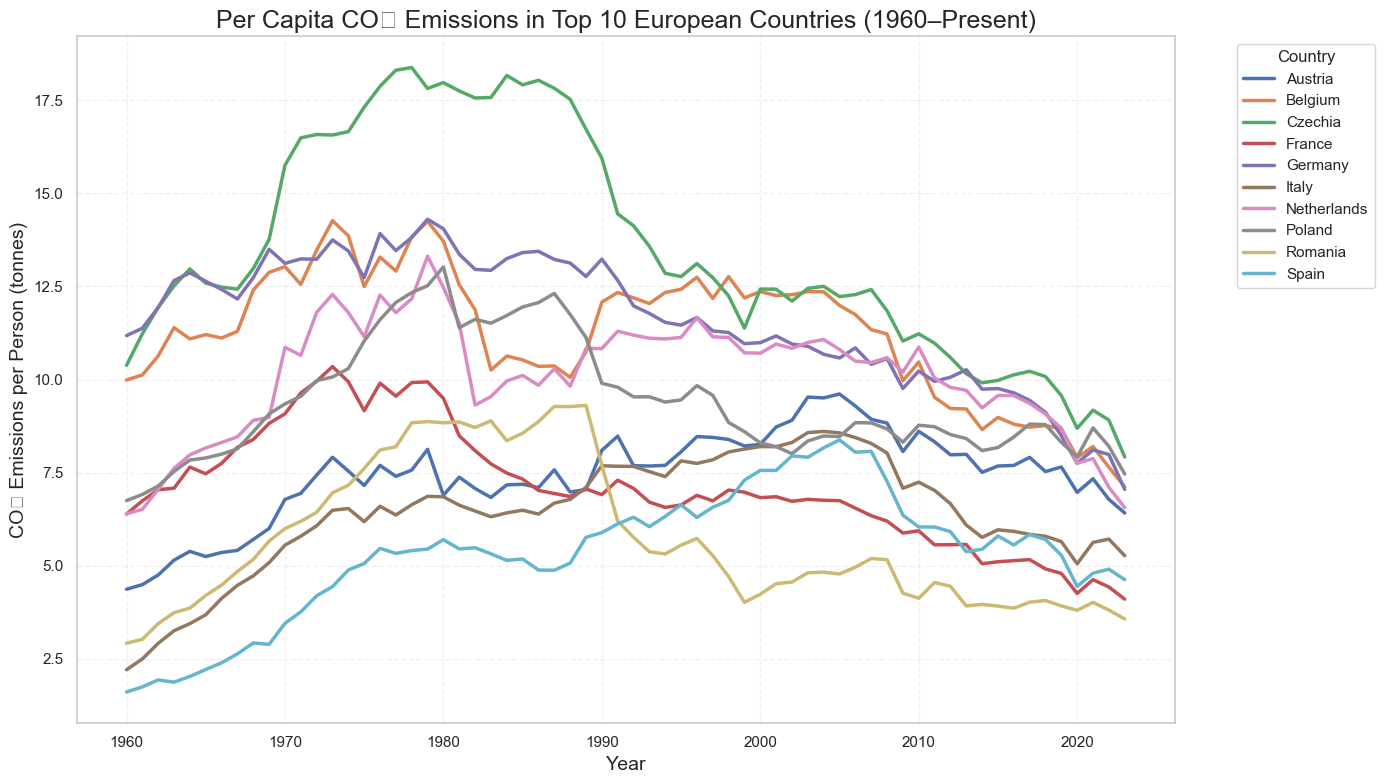

In [13]:
# Prepare data
per_capita_df = df_europe[df_europe['country'].isin(top_emitters)]
per_capita_df = per_capita_df[['country', 'year', 'co2_per_capita']].dropna()

# Plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=per_capita_df, x='year', y='co2_per_capita', hue='country', linewidth=2.5)

# Styling
plt.title('Per Capita CO₂ Emissions in Top 10 European Countries (1960–Present)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('CO₂ Emissions per Person (tonnes)', fontsize=14)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.3)
plt.savefig(r'C:\Users\itzel\OneDrive\Documentos\Proyectos Git\europe-sustainability-story\outputs\plots\PercapitaTop10.png')
plt.show()




## Per Capita Emissions: The Equity Perspective

When we examine CO₂ emissions on a per person basis, a different perspective emerges — one that emphasizes structural and lifestyle-related impacts.

Throughout the historical data, Czechia has consistently led in per capita emissions among major European economies, followed closely by Germany until around 1990. After that, Germany began a gradual decline in per capita emissions, reflecting energy transition efforts and reunification reforms.

In more recent years, Czechia and Belgium have taken the lead, with the Netherlands and Germany close behind. These countries, while smaller in population, maintain relatively high emissions per capita due to their industrial sectors and energy profiles.

This metric is essential when discussing climate justice, as it shifts the focus from sheer national totals to the carbon intensity of everyday life. It reinforces the need for equitable climate policies under the principle of “common but differentiated responsibilities.”



In [10]:
plt.savefig(r'C:\Users\itzel\OneDrive\Documentos\Proyectos Git\europe-sustainability-story\outputs\plots\PerCapitaEmissions.png')

<Figure size 1200x600 with 0 Axes>

C:\Users\itzel\AppData\Local\Temp\ipykernel_15224\1573312542.py:28: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\itzel\AppData\Local\Temp\ipykernel_15224\1573312542.py:29: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.savefig(r'C:\Users\itzel\OneDrive\Documentos\Proyectos Git\europe-sustainability-story\outputs\plots\ProductionvsConsumption.png')
C:\Users\itzel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


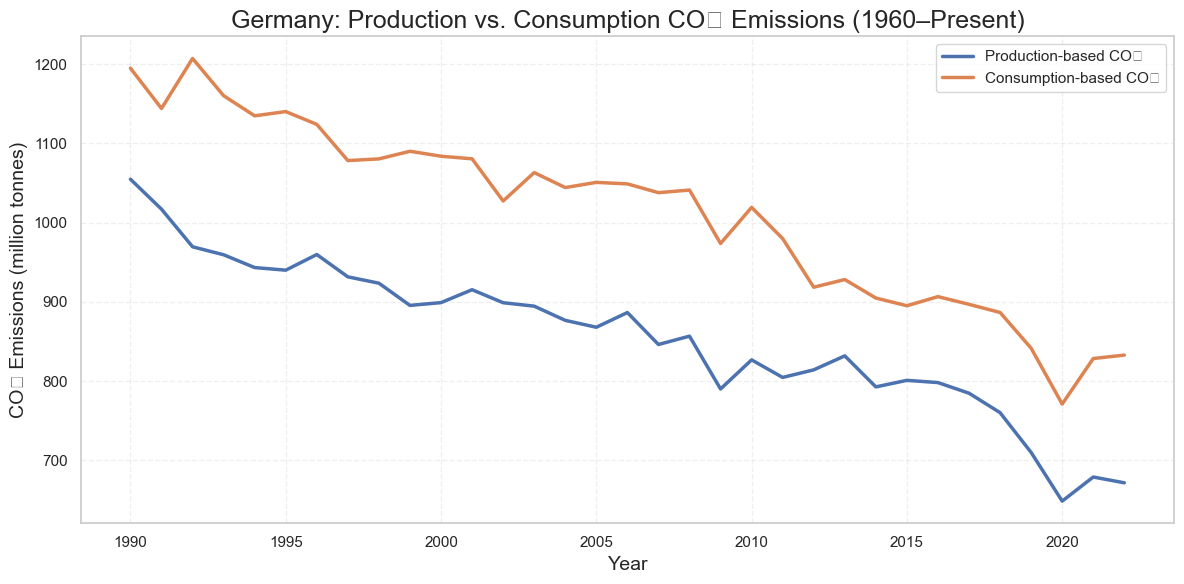

In [11]:
# Prepare the comparison dataset
comp_df = df_europe[df_europe['country'].isin(top_emitters)]
comp_df = comp_df[['country', 'year', 'co2', 'consumption_co2']].dropna()

# Melt into long format for seaborn
comp_df = comp_df.melt(id_vars=['country', 'year'], 
                       value_vars=['co2', 'consumption_co2'], 
                       var_name='type', value_name='emissions')

# Rename types for clarity
comp_df['type'] = comp_df['type'].replace({
    'co2': 'Production-based CO₂',
    'consumption_co2': 'Consumption-based CO₂'
})

# Plot for one country (Germany as example)
germany_df = comp_df[comp_df['country'] == 'Germany']

plt.figure(figsize=(12, 6))
sns.lineplot(data=germany_df, x='year', y='emissions', hue='type', linewidth=2.5)

# Styling
plt.title('Germany: Production vs. Consumption CO₂ Emissions (1960–Present)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('CO₂ Emissions (million tonnes)', fontsize=14)
plt.legend(title='', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig(r'C:\Users\itzel\OneDrive\Documentos\Proyectos Git\europe-sustainability-story\outputs\plots\ProductionvsConsumption.png')
plt.show()


## Germany: Trade-Adjusted Emissions

Production-based emissions account for what a country emits within its territory, while consumption-based emissions adjust for imported and exported goods.

In countries like Germany, the gap between the two suggests that a significant share of CO₂ is outsourced through global trade. This makes emissions accounting more complex and highlights the need for shared responsibility in climate action.

It also shows that even countries with strong domestic climate policies may indirectly contribute to global emissions through imports.
